# WGAN-GP Training

## imports

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb

import pickle


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'celeb'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [3]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [4]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 202599 images belonging to 1 classes.


In [5]:
x_train[0][0][0]

array([[[ 0.05882353,  0.62352943,  0.81960785],
        [ 0.05882353,  0.62352943,  0.81960785],
        [ 0.05882353,  0.62352943,  0.81960785],
        ...,
        [ 0.00392157,  0.56078434,  0.78039217],
        [ 0.00392157,  0.56078434,  0.78039217],
        [-0.01176471,  0.5686275 ,  0.78039217]],

       [[ 0.05882353,  0.62352943,  0.81960785],
        [ 0.05882353,  0.62352943,  0.81960785],
        [ 0.05882353,  0.62352943,  0.81960785],
        ...,
        [ 0.00392157,  0.56078434,  0.78039217],
        [ 0.00392157,  0.56078434,  0.78039217],
        [-0.01176471,  0.5686275 ,  0.78039217]],

       [[ 0.05882353,  0.62352943,  0.81960785],
        [ 0.05882353,  0.62352943,  0.81960785],
        [ 0.05882353,  0.62352943,  0.81960785],
        ...,
        [ 0.00392157,  0.56078434,  0.78039217],
        [ 0.00392157,  0.56078434,  0.78039217],
        [-0.01176471,  0.5686275 ,  0.78039217]],

       ...,

       [[ 0.07450981, -0.03529412,  0.09803922],
        [ 0

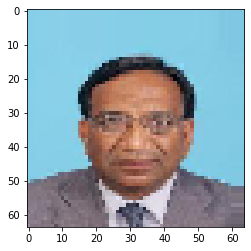

In [6]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [7]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))




Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Tensor("y_pred:0", shape=(64, 1), dtype=float32)
Tensor("interpolated_samples:0", shape=(64, 64, 64, 3), dtype=float32)
[None]
None


ValueError: in converted code:
    relative to /Users/davidfoster:

    Git/Personal/GDL_code/models/WGANGP.py:113 gradient_penalty_loss  *
        gradients_sqr = K.square(gradients)
    .virtualenvs/gdl_code_2/lib/python3.7/site-packages/tensorflow_core/python/keras/backend.py:2190 square
        return math_ops.square(x)
    .virtualenvs/gdl_code_2/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_math_ops.py:10931 square
        "Square", x=x, name=name)
    .virtualenvs/gdl_code_2/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py:545 _apply_op_helper
        (input_name, err))

    ValueError: Tried to convert 'x' to a tensor and failed. Error: None values not supported.


In [ ]:
gan.critic.summary()

In [ ]:
gan.generator.summary()

## training

In [ ]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
BATCH_SIZE = 64

In [ ]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()
